In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

#Sharpe, Markowitz and Merton Miller jointly received the 1990 Nobel Memorial Prize in Economics for this contribution to the field of financial economics.
#In CAPM Settings, investors are risk-averse, prefers high returns(rational) and willing to choose optimal portfolio.
#CAPM assumes an existence of risk-free asset. An investment with zero risk
#Capital Market line is tangent to zero(risk-free) point on effiecient frontier.
#The point where the Capital Market Line intersect the efficient frontier is the Market Portfolio(all securities in the market).
#In CAPM, investors invest in between risk-free and market portfolio.  If investor is willing to have more risk, he will invest in market portfolio and vice-versa.
#

# Beta

Beta is one of the main pillers of CAPM. It helps to quantify the relationship between the security and the market portfolio. 
Market portfolio comprises of all securities in the market. High risk has high return and vice verca.  In recession, prices of securities and market portflio fall and have negative impact and investors can not protect this through diversification because recession is a systemic risk.
Stocks are of safer and risky types. Safer stock earns less when economy grows and risky stocks earns high when economy grows. 

It measures the market risk that cannot be avoided by diversification.  The riskier the stock, the higher is its beta
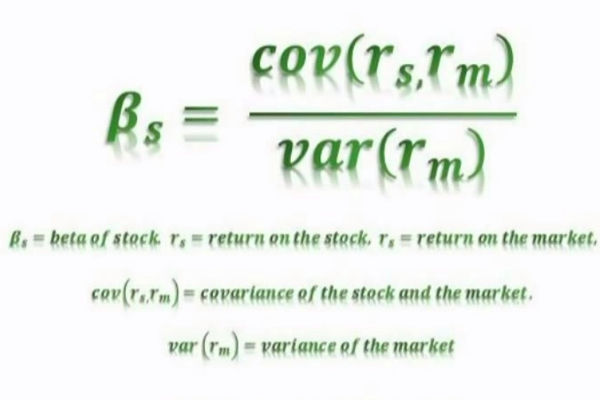


# 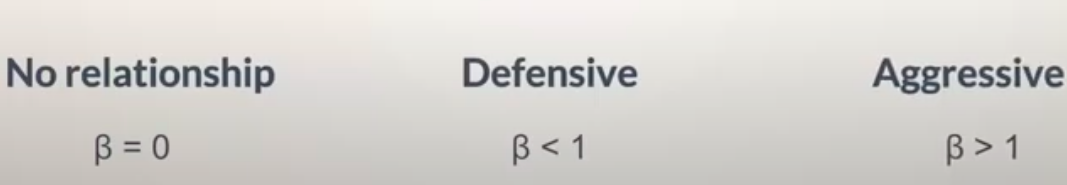

# Features of beta

When beta is greater than 1, the stock performs well than market portfolio when economy grows and vice versa.

Beta is measured from the last 5 years



# Nature of stocks

Walmart v/s Ford.  Walmart is less dependent on economic cycle as compared to Ford.
Beta of Walmart is 0.09
Beta of Ford is 1.1



In [33]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb

# Beta of PG 

In [34]:
tickers = ['PG', '^GSPC']

data = pd.DataFrame()

for t in tickers:
    data[t] = wb.DataReader(t, data_source = 'yahoo', start = "2015-06-01", end = '2020-06-01')['Adj Close']
    
    

In [35]:
data.head()

,PG,^GSPC
Date,,
2015-06-01,67.516037,2111.729980
2015-06-02,67.250587,2109.600098
2015-06-03,67.267715,2114.070068
2015-06-04,66.916649,2095.840088
2015-06-05,66.300148,2092.830078


In [36]:
data.tail()

,PG,^GSPC
Date,,
2020-05-26,112.029999,2991.770020
2020-05-27,113.889999,3036.129883
2020-05-28,116.059998,3029.729980
2020-05-29,115.919998,3044.310059
2020-06-01,117.250000,3055.729980


In [37]:
#log returns
sec_returns = np.log(data/data.shift(1))

In [38]:
sec_returns.head()

,PG,^GSPC
Date,,
2015-06-01,NaN,NaN
2015-06-02,-0.003939,-0.001009
2015-06-03,0.000255,0.002117
2015-06-04,-0.005233,-0.008661
2015-06-05,-0.009256,-0.001437


In [39]:
sec_returns.tail()

,PG,^GSPC
Date,,
2020-05-26,-0.005075,0.012214
2020-05-27,0.016466,0.014718
2020-05-28,0.018874,-0.002110
2020-05-29,-0.001207,0.004801
2020-06-01,0.011408,0.003744


In [40]:
#annualized covariance between PG and GSPC
cov = sec_returns.cov()*250
cov

,PG,^GSPC
PG,0.040611,0.023663
^GSPC,0.023663,0.036371


In [41]:
#numerator of beta
cov_with_market = cov.iloc[0,1]
cov_with_market

0.02366274522556634

In [42]:
#denominator of beta
var_market = sec_returns['^GSPC'].var()*250
var_market


0.03637066801773754

In [43]:
PG_beta = cov_with_market/var_market
PG_beta# defensive beta since less than 1 means less risky.

0.6505996869242627

# CAPM of PG


# 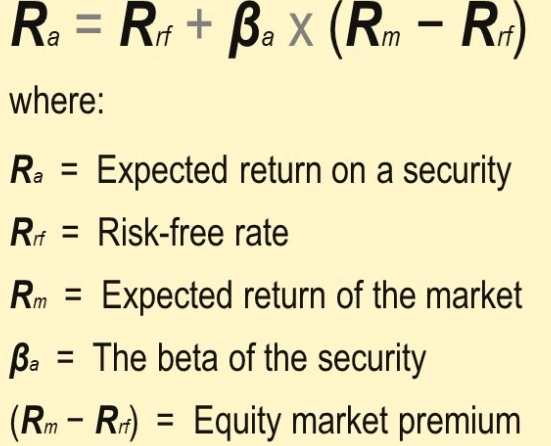

# Risk-free

Risk-free is approximately the US govt. 10 years bond yield= 2.5%

# Equity Market Premium

Historically, it has beeen between 4.5% to 5.5%.  Practitioners uses 5%

In [46]:
PG_er=0.025+ PG_beta*0.05
PG_er#it is CAPM


0.05752998434621314

In [47]:
PG_er*100#this is expected return of PG.  

5.752998434621314

# Expected return of PG/CAPM

When an investor invest in PG, he will expect to earn approx 5.75% to be compensated for the risk he has taken.

# Sharpe Ratio for comparing two stocks or two investment portfolios

Rational investors want to maximize their returns as well as minimize their risk.  They want to invest in less volatile securities.

Rational investor considers both risk and returns. 

They want to compare stocks in terms of risk-return performance.

It allows to compare Stock A v/s Stock B as well as Investment portfolio A v/s Investment portfolio B

It measures performance of stock compared to risk-free investment after adjusting for its risk.  

It measures the risk-adjusted return of financial portfolio.

Sharpe ratio for risk-free asset is zero.

If two funds offer similar returns, the one with higher standard deviation will have a lower Sharpe ratio.  In order to compensate for the higher standard deviation, the fund needs to generate a higher return to maintain a higher Sharpe ratio.

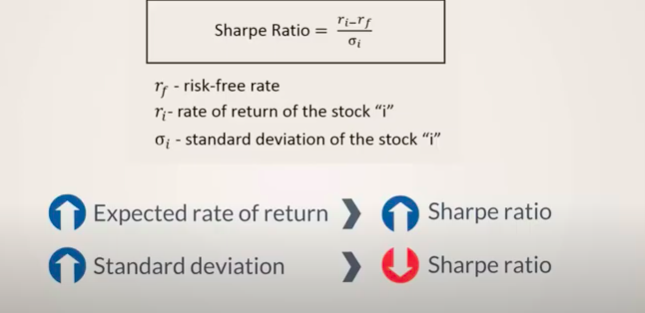
 

In [51]:
sharpe=(PG_er-0.025)/(sec_returns['PG'].std()*250**0.5)
sharpe

0.16142176440970085

# Interpretation of sharpe ratio

PG has sharpe ratio of approx 16%.  We can use this sharpe ratio to compare it with other stock.

It other stock B has sharpe ratio 17%, then that stock B has higher returns on risk-adjusted basis than PG.

Higher sharpe ratio anticipated

# Drawback of sharpe ratio

The sharpe ratio considers standard deviation, which assumes a symmetrical distribution of returns. For asymmetrical return distribution with a Skewness greater or lesser than zero and Kurtosis greater or lesser than 3, the Sharpe ratio may not be a good measure of performance.  




# Solution for sharpe ratio(Sortino ratio)

Considering standard deviation as a proxy for risk has its pitfalls. Standard deviation takes into account both the positive as well as the negative deviation in returns from the mean, hence it doesn’t accurately measure the downside risk. Measures like Sortino, which only considers negative deviation from the mean return, can remove the limitation of Sharpe ratio to some extent.

In [62]:
#for calculation of sortino ratio, export to csv

sec_returns.to_csv('/Users/user/Desktop/data.csv')